## Data pre-process

In [18]:
import yfinance as yf
import pandas as pd
# import pandas_ta
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [19]:
factors_data = pd.read_csv('../Factors/merge_Factors.csv')
factors_data

,Date,Index,Return,Momentum_1,Momentum_2,Momentum_3,Turnover,Volitility_1,Volitility_2,Volitility_3,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
0,2021-01-04,FTNT,-0.019996,1.509253,0.423402,-0.062156,-0.140275,0.176756,-0.283665,-0.617714,...,0,0,0,0,0,0,0,0,1,0
1,2021-01-05,FTNT,-0.026243,0.732189,0.206508,-0.259777,-0.134318,0.093954,-0.282621,-0.574620,...,0,0,0,0,0,0,0,0,1,0
2,2021-01-06,FTNT,-0.025610,0.226557,-0.277413,-0.454297,-0.148214,0.027195,-0.298359,-0.577086,...,0,0,0,0,0,0,0,0,1,0
3,2021-01-07,FTNT,0.037217,0.369790,-0.206709,-0.379767,-0.147722,-0.010949,-0.292402,-0.548459,...,0,0,0,0,0,0,0,0,1,0
4,2021-01-08,FTNT,0.034136,0.600674,0.073511,-0.228582,-0.155348,-0.034240,-0.249017,-0.537138,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207499,2022-07-25,SKYW,0.008345,-0.171436,-1.222563,-1.431199,0.079431,-0.727409,0.135707,-0.203472,...,0,0,0,0,0,0,1,0,0,0
207500,2022-07-26,SKYW,-0.026667,-0.780535,-1.052905,-1.362528,0.040162,-0.728702,0.077014,-0.291160,...,0,0,0,0,0,0,1,0,0,0
207501,2022-07-27,SKYW,0.045820,-0.258852,-0.881825,-1.278662,0.012201,-0.762282,0.073814,-0.243038,...,0,0,0,0,0,0,1,0,0,0
207502,2022-07-28,SKYW,0.017164,-0.208851,-0.969848,-1.040081,-0.006354,-0.848450,0.061305,-0.267561,...,0,0,0,0,0,0,1,0,0,0


In [20]:
factors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207504 entries, 0 to 207503
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Date                             207504 non-null  object 
 1   Index                            207504 non-null  object 
 2   Return                           207504 non-null  float64
 3   Momentum_1                       207504 non-null  float64
 4   Momentum_2                       207504 non-null  float64
 5   Momentum_3                       207504 non-null  float64
 6   Turnover                         207504 non-null  float64
 7   Volitility_1                     207504 non-null  float64
 8   Volitility_2                     207504 non-null  float64
 9   Volitility_3                     207504 non-null  float64
 10  Financial Quality                207504 non-null  float64
 11  EP                               207504 non-null  float64
 12  BP

In [8]:
# add return column:
# factors_data['ROR'] = (factors_data.Adj_Close - factors_data.Adj_Close.shift(1))/factors_data.Adj_Close.shift(1)
# factors_data.loc[(data.Date == '2021-01-04'),'ROR']=0

# sort data by date for OLS regression
factors_data = factors_data.sort_values(by=['Date'])
factors_data

,Date,Index,Adj_Close,Momentum_1m,Momentum_2m,Momentum_3m,Return,Turnover_1m,Turnover_2m,Turnover_3m,...,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities,ROR
0,2021-01-04,FTNT,29.112000,1.509253,0.423402,-0.062156,-0.019996,-0.285383,-0.086579,-0.048863,...,0,0,0,0,0,0,0,1,0,NaN
26136,2021-01-04,CTHR,1.250000,-0.020031,1.140033,0.605953,0.016260,-0.353717,-0.055716,0.066912,...,1,0,0,0,0,0,0,0,0,-0.934930
204732,2021-01-04,PAHC,18.936075,0.302209,-0.231708,-0.402900,0.014933,-0.001166,-0.033104,-0.093394,...,0,0,0,0,1,0,0,0,0,3.303653
5940,2021-01-04,EXLS,83.870003,-0.538165,-0.757892,-0.001444,-0.014801,-0.731085,-0.579742,-0.555984,...,0,0,0,0,0,0,0,1,0,-0.836424
131868,2021-01-04,ALGN,526.460022,-0.021759,-0.452791,1.595695,-0.014821,-0.317184,0.245871,0.212710,...,0,0,0,0,1,0,0,0,0,260.920410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140183,2022-07-29,VNDA,10.780000,-0.787853,0.325697,0.486252,-0.011916,0.121679,0.026048,0.059141,...,0,0,0,0,1,0,0,0,0,-0.011916
140579,2022-07-29,URBN,20.480000,-0.334830,-0.478173,-0.761560,0.006388,1.781980,1.871893,1.857321,...,1,0,0,0,0,0,0,0,0,0.006388
140975,2022-07-29,WTW,206.119888,-0.433603,-0.313486,-0.361385,0.011289,-0.347148,-0.445530,-0.356648,...,0,0,0,1,0,0,0,0,0,0.011289
141767,2022-07-29,IBKR,58.689999,-0.483614,-0.372390,-0.128389,0.007727,0.024438,-0.005658,0.001846,...,0,0,0,1,0,0,0,0,0,0.007727


In [23]:
list(factors_data.columns)[3:]

['Momentum_1',
 'Momentum_2',
 'Momentum_3',
 'Turnover',
 'Volitility_1',
 'Volitility_2',
 'Volitility_3',
 'Financial Quality',
 'EP',
 'BP',
 'industry_Basic Materials',
 'industry_Communication Services',
 'industry_Consumer Cyclical',
 'industry_Consumer Defensive',
 'industry_Energy',
 'industry_Financial Services',
 'industry_Healthcare',
 'industry_Industrials',
 'industry_Real Estate',
 'industry_Technology',
 'industry_Utilities']

In [24]:
factor_cols = list(factors_data.columns)[3:]

len(factor_cols)

21

<AxesSubplot:>

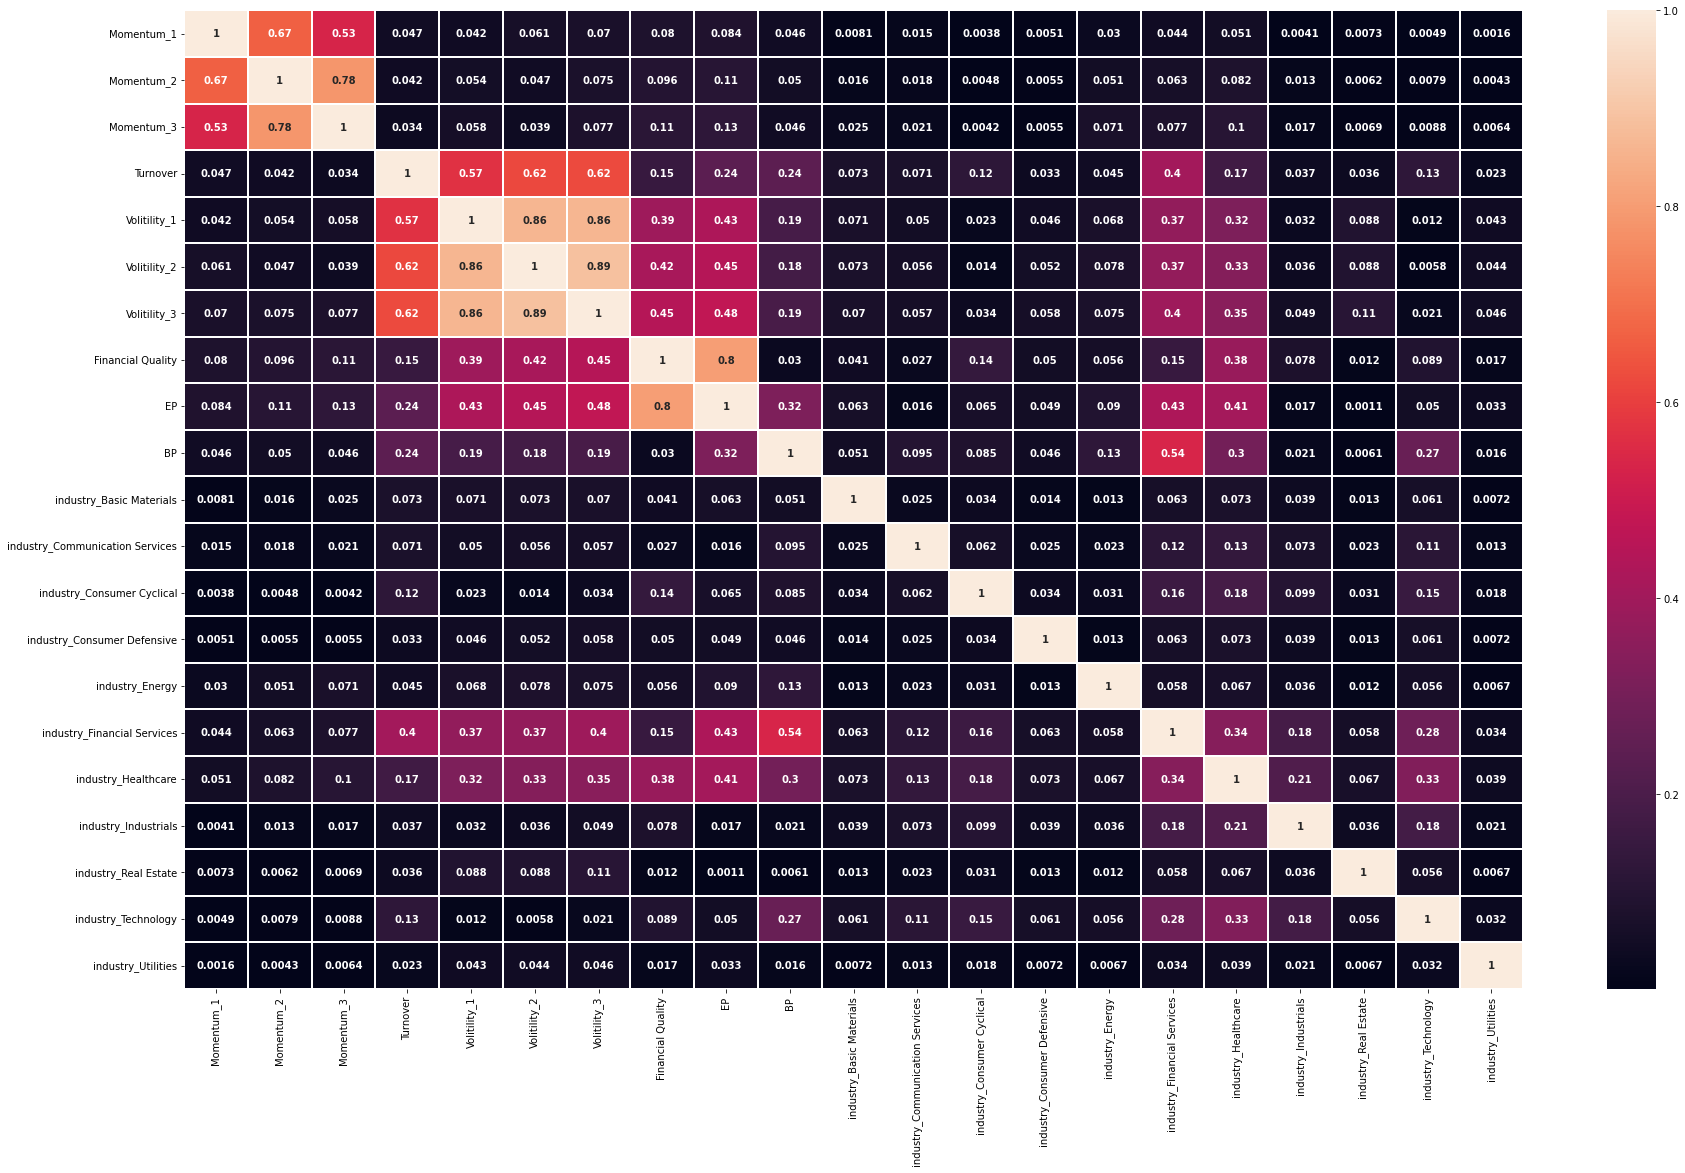

In [25]:
# correlation between factors
factors_df = factors_data[factor_cols]
plt.subplots(figsize=(30,18))
sns.heatmap(abs(factors_df.corr()), linewidth=0.05, annot=True, annot_kws={'weight':'bold'})

In [90]:
# calculate VIF
# VIF = 1 → No correlation
# VIF = 1 to 5 → Moderate correlation
# VIF >10 → High correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(df):
    VIF_df = pd.DataFrame()
    VIF_df["Factors"] = df.columns
    VIF_df["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    
    return VIF_df

VIF_scores_df = vif_scores(factors_df)
VIF_scores_df = VIF_scores_df.sort_values(by=['VIF Scores'], ascending=False)
VIF_scores_df

,Factors,VIF Scores
4,Turnover_2m,38.414400
10,std_2m,24.189723
5,Turnover_3m,22.211035
11,std_3m,19.858185
3,Turnover_1m,14.029204
7,Volatility_2m,10.886419
9,std_1m,9.400566
13,ROE,9.153225
8,Volatility_3m,8.849144
12,ROA,7.990023


In [13]:
# split for training and testing data for test regression:
train_data = factors_data.loc[(factors_data['Date'] >= '2021-01-01') & (factors_data['Date'] <= '2022-05-31')]
test_data = factors_data.loc[(factors_data['Date'] >= '2022-06-01') & (factors_data['Date'] <= '2022-07-31')]

In [14]:
y_train = train_data["Return"]
x_train = train_data[factor_cols]
y_test = test_data["Return"]
x_test = test_data[factor_cols]

In [16]:
# test on OLS regression
lr = sm.OLS(y_train, x_train)
results = lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Return   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              379.8
Date:                Fri, 04 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:27:01   Log-Likelihood:                      3.4967e+05
No. Observations:              186020   AIC:                                 -6.993e+05
Df Residuals:                  186004   BIC:                                 -6.991e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Momentum_1m       0.0062      0.000     53.110      0.000       0.006       0.006
Momentum_2m       0.0006      0.000      3.621      0.000       0.000       0.001
Momentum_3m       0.0002      0.000      1.648      0.099   -4.42e-05       0.001
Turnover_1m      -0.0006      0.000     -1.807      0.071      -0.001     4.9e-05
Turnover_2m       0.0003      0.001      0.642      0.521      -0.001       0.001
Turnover_3m       0.0003      0.000      0.762      0.446      -0.000       0.001
Volatility_1m     0.0006      0.000      2.883      0.004       0.000       0.001
Volatility_2m -7.067e-05      0.000     -0.246      0.806      -0.001       0.000
Volatility_3m    -0.0011      0.000     -4.225      0.000      -0.002      -0.001
std_1m           -0.0002      0.000     -0.906      0.365      -0.001       0.000
std_2m            0.0001      0.000      0.266      0.790      -0.001       0.001
std_3m            0.0013      0.000      3.553      0.000       0.001       0.002
ROA           -4.508e-05      0.000     -0.186      0.852      -0.001       0.000
ROE           -8.245e-05      0.000     -0.318      0.750      -0.001       0.000
EP             4.778e-05      0.000      0.280      0.780      -0.000       0.000
BP             2.753e-05      0.000      0.272      0.786      -0.000       0.000
==============================================================================
Omnibus:                    92530.418   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7978397.676
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                      34.942   Cond. No.                         21.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
results.pvalues.sort_values()

Momentum_1m      0.000000
Volatility_3m    0.000024
Momentum_2m      0.000293
std_3m           0.000381
Volatility_1m    0.003937
Turnover_1m      0.070802
Momentum_3m      0.099288
std_1m           0.364866
Turnover_3m      0.446251
Turnover_2m      0.521037
ROE              0.750487
EP               0.779521
BP               0.785563
std_2m           0.789914
Volatility_2m    0.805644
ROA              0.852462
dtype: float64

### Get factors_returns, p values, t values from mutil-factors regression:

In [26]:
dates = factors_data['Date'].unique()

In [27]:
factors_returns_df = pd.DataFrame()
p_values_df = pd.DataFrame()
t_values_df = pd.DataFrame()


for date in dates:
    data = factors_data.loc[factors_data["Date"]==date, ["Date", "Index", "Return"]+factor_cols]
    y = data["Return"]
    x = data[factor_cols]
    
    lr = sm.OLS(y, x)
    result = lr.fit()
    coef = result.summary2().tables[1]['Coef.']
    pvalue = result.summary2().tables[1]['P>|t|']
    t = result.summary2().tables[1]['t']
    
    factors_returns_df = pd.concat([factors_returns_df, coef.to_frame().T], ignore_index=True)
    p_values_df = pd.concat([p_values_df, pvalue.to_frame().T], ignore_index=True)
    t_values_df = pd.concat([t_values_df, t.to_frame().T], ignore_index=True)

factors_returns_df.insert(0,'Date',dates)
p_values_df.insert(0,'Date',dates)
t_values_df.insert(0,'Date',dates)

In [29]:
factors_returns_df

,Date,Momentum_1,Momentum_2,Momentum_3,Turnover,Volitility_1,Volitility_2,Volitility_3,Financial Quality,EP,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
0,2021-01-04,-0.000948,0.000036,0.010870,0.006812,0.002815,-0.014170,0.009535,0.006003,-0.003098,...,-0.023277,-0.022704,-0.006188,0.005069,-0.011636,0.012894,-0.016904,-0.018643,-0.006071,0.012044
1,2021-01-05,0.009586,0.002485,0.002388,0.006949,0.000199,-0.013681,0.015522,-0.003681,0.000627,...,0.006050,0.016480,0.011823,0.071107,0.016647,0.013837,0.026994,0.018699,0.018669,0.004239
2,2021-01-06,0.000074,0.016316,0.004311,-0.001718,0.002436,-0.019410,0.007048,-0.003619,0.007029,...,0.008197,0.028300,0.012329,0.027857,0.025042,0.025875,0.029766,0.013102,0.011231,0.031544
3,2021-01-07,0.007328,-0.000265,0.006745,0.004697,0.003074,-0.011191,0.013861,-0.002142,-0.002465,...,0.015938,0.015681,0.012479,-0.003019,0.018788,0.023937,0.020804,0.018777,0.038640,0.079254
4,2021-01-08,0.008636,-0.001506,0.004304,0.004211,0.003934,-0.009734,0.004329,0.001274,-0.007426,...,0.007803,-0.007259,0.000227,-0.020631,0.007696,0.009179,-0.003232,0.015458,0.000705,-0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,0.003032,-0.003785,0.006020,-0.000013,-0.001985,0.005602,-0.003634,0.001508,0.002674,...,0.003076,-0.006034,-0.004735,0.080441,0.001540,0.001094,0.004362,0.005575,-0.007861,0.026093
392,2022-07-26,0.013099,0.000809,-0.000058,-0.004694,0.001594,-0.000669,-0.004628,-0.003784,0.002255,...,-0.013403,-0.023717,-0.000014,0.003018,-0.012973,0.005632,-0.005651,-0.006237,-0.013006,-0.019430
393,2022-07-27,0.009402,0.002375,0.002382,0.006447,-0.012078,-0.005043,0.020075,0.003858,0.000689,...,0.034264,0.024188,0.022495,0.061480,0.024195,0.007783,0.028031,0.029986,0.032909,0.020503
394,2022-07-28,0.016022,-0.003160,0.007342,0.002359,-0.008570,-0.000283,0.008727,0.001714,-0.001543,...,-0.000720,0.029756,0.006650,0.031256,0.011964,-0.005188,0.020174,0.052810,0.014811,-0.006967


In [15]:
factors_returns_df.to_csv("../Analysis/factors_returns_multi.csv", index=False)
p_values_df.to_csv("../Analysis/p_values_multi.csv", index=False)
t_values_df.to_csv("../Analysis/t_values_multi.csv", index=False)